In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

file = "mumbiker_nikhil.json"
data = None

with open(file, "r") as f:
    data = json.load(f)

channel_id, stats = data.popitem()
print(channel_id)

channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]


# Channel Statistics
print("views :", channel_stats["viewCount"])
print("subscriber :", channel_stats["subscriberCount"])
print("videos :", channel_stats["videoCount"])


UCNn6AaHharXIbkRleXGboiQ
views : 1091466255
subscriber : 3710000
videos : 1380


In [3]:

# Video Statistics
# Sort video data according to the view count
sorted_videos = sorted(
    video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True
)
stats = []
for vid in sorted_videos:
    video_id = vid[0]
    title = vid[1]["title"]
    views = int(vid[1]["viewCount"])
    likes = int(vid[1]["likeCount"])
    dislikes = int(vid[1]["dislikeCount"])
    comments = vid[1]["commentCount"]
    stats.append(
        [
            title,
            views,
            likes,
            dislikes,
            comments,
        ]
    )
df = pd.DataFrame(
    stats,
    columns=[
        "title",
        "views",
        "likes",
        "dislikes",
        "comments",
    ],
)
df.head(10)

,title,views,likes,dislikes,comments
0,MY MARRIAGE VLOG | DULHA EDITION,6317079,373961,11888,36413
1,MY DREAM HOUSE TOUR 🏠 ❤️ 🔥,2880315,257611,5632,18549
2,THIS COMPLETES OUR MARRIAGE !!!,2729331,233336,5291,12272
3,WE GOT MARRIED !!!!!,1843128,264845,2809,47877
4,TIME TO TAKE HER HOME FOREVER !!!,1768832,205076,1892,4871
5,SAB KUCH BADAL GAYA ..LIFE NE MARA 360 TURN..,1738087,209803,2340,9465
6,MY BEAUTIFUL AUDI Q7 REVIEW ....,1706768,151758,3463,3880
7,MAZAK MAZAK MAI ZYADA PAISE DENE PADEY !!,1601617,157139,2279,4553
8,A DAY FULL OF STRUGGLE TO SET THE HOUSE RIGHT,1506128,153057,2647,3582
9,HAD TO RUSH HER TO THE HOSPITAL. 🏥,1393696,128803,3215,3772


C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 127973 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Mihir Jadhav\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238

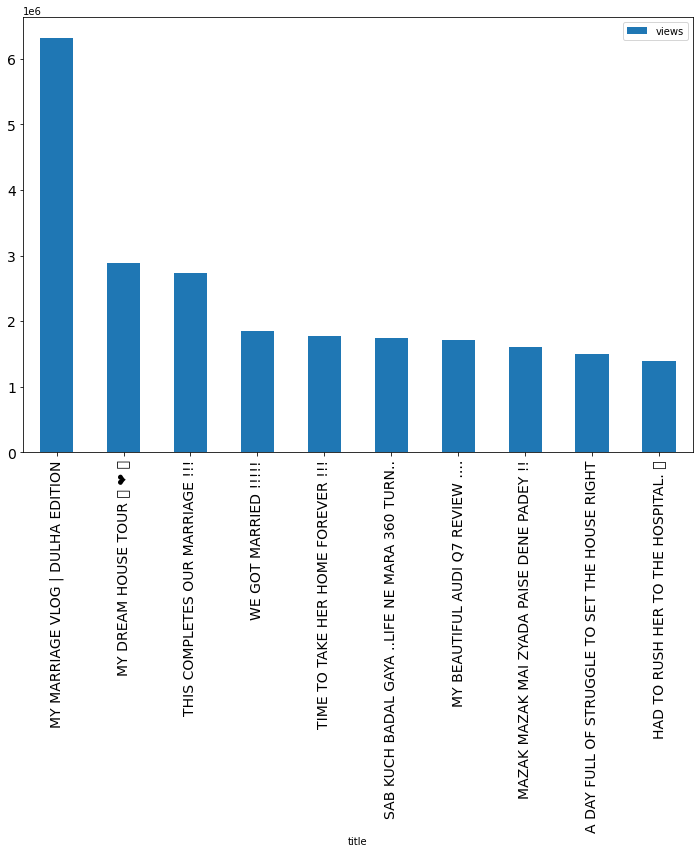

In [4]:
top10 = df.head(10)
ax = top10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)